In [1]:
import sys
sys.path.insert(0, '../')

import data_preparation as dp
import rnn_model as rnn

import numpy as np
import pandas as pd
import tensorflow as tf
import random as rn
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [3]:
sentiment_data = dp.data_loader()
sentiment_data = dp.data_preprocessor(sentiment_data)

In [4]:
# Test the different data preprocessing methods
columns = ['tokenized_text', 'no_punctuation_text', 'no_stopwords_text', 'stemmed_text', 'lemmatized_text']
results = []
for column in columns:
    model_result = rnn.train_and_evaluate(sentiment_data, column)
    results.append(model_result)

Epoch 1/20
254/254 [==============================] - 70s 249ms/step - loss: 5.6258 - val_loss: 2.3712
Epoch 2/20
254/254 [==============================] - 60s 235ms/step - loss: 1.3050 - val_loss: 0.6307
Epoch 3/20
254/254 [==============================] - 64s 252ms/step - loss: 0.3981 - val_loss: 0.2365
Epoch 4/20
254/254 [==============================] - 64s 251ms/step - loss: 0.1717 - val_loss: 0.1272
Epoch 5/20
254/254 [==============================] - 61s 241ms/step - loss: 0.0894 - val_loss: 0.0732
Epoch 6/20
254/254 [==============================] - 61s 242ms/step - loss: 0.0533 - val_loss: 0.0559
Epoch 7/20
254/254 [==============================] - 61s 240ms/step - loss: 0.0402 - val_loss: 0.0532
Epoch 8/20
254/254 [==============================] - 62s 243ms/step - loss: 0.0347 - val_loss: 0.0508
Epoch 9/20
254/254 [==============================] - 63s 249ms/step - loss: 0.0308 - val_loss: 0.0505
Epoch 10/20
254/254 [==============================] - 63s 250ms/step - l

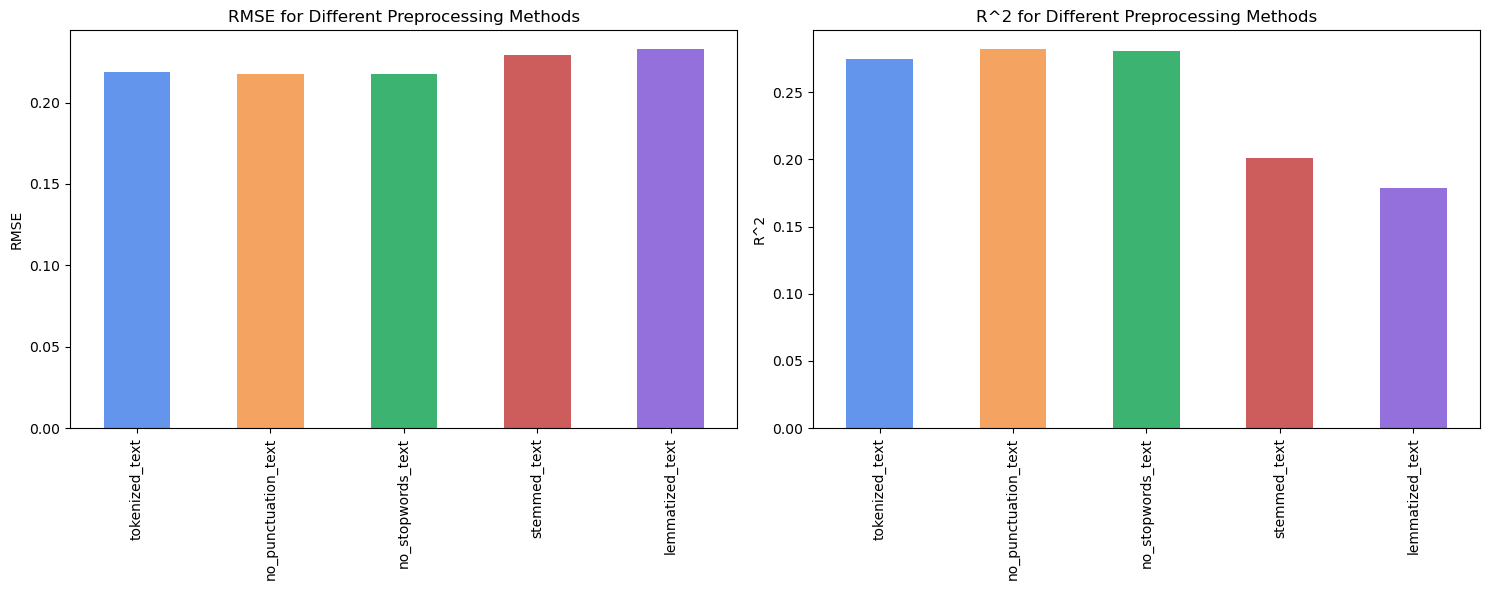

In [5]:
results_df = pd.DataFrame(results, columns=['RMSE', 'R^2'], index=columns)

# Create a list of colors
colors = ['cornflowerblue', 'sandybrown', 'mediumseagreen', 'indianred', 'mediumpurple']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot RMSE
results_df['RMSE'].plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('RMSE for Different Preprocessing Methods')
axes[0].set_ylabel('RMSE')

# Plot R^2
results_df['R^2'].plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('R^2 for Different Preprocessing Methods')
axes[1].set_ylabel('R^2')

plt.tight_layout()
plt.show()